![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import re
from datetime import datetime
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
10728,id_5169,Madrid,NaN,5172.0,NaN,8.0,"[[], []]",/Restaurant_Review-g187514-d8657804-Reviews-La...,d8657804,1,4.0
41771,id_15058,London,"['European', 'Kosher']",15069.0,$$ - $$$,18.0,"[['Could be excellent', 'Gabby'], ['11/22/2017...",/Restaurant_Review-g186338-d1015913-Reviews-Ei...,d1015913,1,3.0
44795,id_2712,Paris,"['French', 'European']",2713.0,$$ - $$$,119.0,"[['Tastiest Beef ever!', 'Fantastic meal in an...",/Restaurant_Review-g187147-d4374455-Reviews-Hu...,d4374455,1,4.5
19916,id_3241,Lisbon,"['Mediterranean', 'European', 'Portuguese']",3245.0,$$ - $$$,35.0,"[['Nice meal', 'Extremely rude waiter'], ['10/...",/Restaurant_Review-g189158-d3505236-Reviews-Ma...,d3505236,1,3.5
20579,id_2049,Brussels,"['Brazilian', 'Healthy', 'South American']",2050.0,NaN,3.0,"[[], []]",/Restaurant_Review-g188644-d7623482-Reviews-Po...,d7623482,1,4.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [16]:
# Далее заполняем пропуски средним по городу
def fillna_for_number_of_review(s):
    if pd.isnull(s['Number of Reviews']):
        return Number_of_Reviews_mean_of_city[s['City']]
    else:
        return s['Number of Reviews']

Number_of_Reviews_mean_of_city = data.groupby(['City'])['Number of Reviews'].mean()
data['Number of Reviews'] = data.apply(fillna_for_number_of_review, axis = 1)
data['Number of Reviews']

0          4.0
1         97.0
2         28.0
3        202.0
4        162.0
         ...  
49995     79.0
49996    542.0
49997      4.0
49998     70.0
49999    260.0
Name: Number of Reviews, Length: 50000, dtype: float64

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [17]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1604
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [18]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data_city = data['City']
data = pd.get_dummies(data, columns=[ 'City'], dummy_na=True)
data['City'] = data_city

In [19]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,City
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,1,0,0,0,0,0,0,0,Paris
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,Helsinki
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,Edinburgh
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,London
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,Bratislava


In [20]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,City
24239,id_1275,['Mediterranean'],1276.0,$,10.0,"[['Excellent !', 'Good vibes and great live mu...",/Restaurant_Review-g188644-d3863558-Reviews-Sa...,d3863558,1,4.5,...,0,0,0,0,0,0,0,0,0,Brussels
40569,id_3178,"['Italian', 'International', 'Mediterranean', ...",3179.0,$$ - $$$,5.0,[['Stylish ambience -healthy and delicious fo....,/Restaurant_Review-g187497-d12796954-Reviews-B...,d12796954,1,5.0,...,0,0,0,0,0,0,0,0,0,Barcelona
26848,id_405,NaN,406.0,NaN,16.0,"[['Great', 'A little Gem'], ['12/12/2017', '11...",/Restaurant_Review-g189852-d11860923-Reviews-R...,d11860923,1,4.5,...,0,0,0,0,1,0,0,0,0,Stockholm
37931,id_6505,NaN,6508.0,NaN,5.0,"[[], []]",/Restaurant_Review-g187514-d11930661-Reviews-L...,d11930661,1,4.0,...,0,0,0,0,0,0,0,0,0,Madrid
878,id_878,NaN,538.0,NaN,24.0,"[['Get Your Pastries Here!', 'My favorite pizz...",/Restaurant_Review-g190479-d4222546-Reviews-Ap...,d4222546,0,0.0,...,1,0,0,0,0,0,0,0,0,Oslo


#### Возьмем следующий признак "Price Range".

In [21]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [22]:
#Функция label encoder для признака 'Price Range'
def revalue_price_range(s):
    rank_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
    if pd.isnull(s):
        return s
    else:
        return rank_dict[s]

#Заполним пропуски самым распространенным значением '$$ - $$$'
data['Price Range'].fillna('$$ - $$$', inplace = True)
data['Price Range'] = data['Price Range'].apply(revalue_price_range)
data

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,City
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,1,0,0,0,0,0,0,0,Paris
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,Helsinki
2,id_2,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,Edinburgh
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,London
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,Bratislava
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,0,0,0,0,0,Milan
49996,id_6340,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,1,0,0,0,0,0,0,0,Paris
49997,id_1649,"['Japanese', 'Sushi']",1652.0,2,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0,1,0,0,0,0,Stockholm
49998,id_640,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,0,0,0,0,1,0,0,Warsaw


> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

**Признак City_population**

In [23]:
#Добавим признак, отвечающий за население города
dict_population = {'Paris': 2.148 , 'Stockholm': 0.975, 'London': 8.982, 'Berlin': 3.769, 'Munich': 1.472, 'Oporto': 0.214,
       'Milan': 1.352, 'Bratislava': 0.424, 'Vienna': 1.897, 'Rome': 2.873, 'Barcelona': 5.575, 'Madrid': 6.642,
       'Dublin': 1.388, 'Brussels': 0.174, 'Zurich': 0.402, 'Warsaw': 1.708, 'Budapest': 1.752, 'Copenhagen': 0.602,
       'Amsterdam': 0.821, 'Lyon': 0.513, 'Hamburg': 1.845 , 'Lisbon': 0.504, 'Prague': 1.309, 'Oslo': 0.681,
       'Helsinki': 0.631, 'Edinburgh': 0.529, 'Geneva': 0.499, 'Ljubljana': 0.279, 'Athens': 0.664,
       'Luxembourg': 0.613, 'Krakow': 0.779}

data['City_population'] = data.City.apply(lambda x: dict_population[x])
data

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,City,City_population
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,1,0,0,0,0,0,0,0,Paris,2.148
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,Helsinki,0.631
2,id_2,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,Edinburgh,0.529
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,London,8.982
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,Bratislava,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,0,0,0,0,Milan,1.352
49996,id_6340,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,1,0,0,0,0,0,0,0,Paris,2.148
49997,id_1649,"['Japanese', 'Sushi']",1652.0,2,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,1,0,0,0,0,Stockholm,0.975
49998,id_640,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,0,0,0,1,0,0,Warsaw,1.708


**Обработка признака Cuisine Style**

In [24]:
#Разобьем типы представленных кухонь через One-Hot Encoding создав новый dataframe
data_cuisine = data['Cuisine Style']
data_cuisine = data_cuisine.str.replace('[', '')
data_cuisine = data_cuisine.str.replace(']', '')
data_cuisine = data_cuisine.str.replace('\'','')
data_cuisine = data_cuisine.str.replace(', ', ',')
data_cuisine = data_cuisine.str.get_dummies(',')
data_cuisine['cuisine_count'] = data_cuisine.sum(axis = 1)
data = pd.concat([data, data_cuisine], axis = 1)
#Добавим признак наличия или отсутствия списка кухонь
data['Cuisine Style is NAN'] = pd.isna(data['Cuisine Style']).astype('uint8')
data

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan,cuisine_count,Cuisine Style is NAN
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,0,0,0,0,2,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,1,1,0,0,0,0,0,0,5,0
2,id_2,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,1,0,0,0,0,0,0,5,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,1,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,1,1,0,0,0,0,0,0,4,0
49996,id_6340,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,1,0,0,0,0,0,0,5,0
49997,id_1649,"['Japanese', 'Sushi']",1652.0,2,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0,0,0,0,0,2,0
49998,id_640,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,1,0,0,0,0,0,0,5,0


In [25]:
#Функция определяющая количество дней между:
#now == True: последним отзывом и текущим моментом
#now == False: последними отзывами (если отзыв один, вернет 0)

def days_between_last_review_dates(s, now):
    pat = re.compile('\'\d+\/\d+\/\d+\'?')
    dates = pat.findall(s)
    new_date_list = []
    if len(dates) > 0:
        for date in dates:
            if len(date)>=2:
                date = date[1:-1]
                dt = datetime.strptime(date, '%m/%d/%Y')
                new_date_list.append(dt)
        if now:
            return (datetime.now() - max(new_date_list)).days
        else:
            return (max(new_date_list) - min(new_date_list)).days
    elif not now:
        return 0.0

#Заполнение пустых значений
data['Reviews'].fillna('[[], []]', inplace = True)
#Создание признака, отвечающего за наличие хотя бы одного отзыва
data['Reviews_is_na'] = data['Reviews'].apply(lambda x: 0 if x == '[[], []]' else 1).astype('uint8')
#Создание признака передающего число дней между отзывами
data['Days between reviews'] = data['Reviews'].apply(days_between_last_review_dates, args = (False,))
#Создание признака передающего число дней с последего отзыва до самого позднего в датасете
data['Last review days'] = data['Reviews'].apply(days_between_last_review_dates, args = (True,))
The_last_review = data['Last review days'].min()
data['Last review days'] = data['Last review days'].apply(
    lambda x: 0.0 if pd.isnull(x) else x - The_last_review)

data[['Last review days', 'Days between reviews']]

,Last review days,Days between reviews
0,0.0,0.0
1,83.0,37.0
2,60.0,22.0
3,82.0,14.0
4,18.0,15.0
...,...,...
49995,72.0,34.0
49996,67.0,9.0
49997,480.0,3127.0
49998,230.0,23.0


In [26]:
#Функция нормировки признака Ranking в зависимости от города
def normalize_ranking(s, Ranking_stats_by_city_df):
    return (s['Ranking'] - Ranking_stats_by_city_df.loc[s['City']]
            ['Ranking mean']) / Ranking_stats_by_city_df.loc[s['City']]['Ranking std']

#Создание dataframe среднего значение и среднеквадратичного отклонения показателя Ranking по городам
Ranking_mean_of_city = data.groupby(['City'])['Ranking'].mean()
Ranking_mean_of_city.name = 'Ranking mean'
Ranking_std_of_city = data.groupby(['City'])['Ranking'].std()
Ranking_std_of_city.name = 'Ranking std'
Ranking_stats_by_city_df = Ranking_mean_of_city.to_frame().join(Ranking_std_of_city)

#Применение normalize_ranking
data['Ranking'] = data.apply(normalize_ranking, axis = 1, args = (Ranking_stats_by_city_df,))
data['Ranking']

0        1.491224
1       -1.404530
2       -0.146058
3       -1.376113
4       -1.673120
           ...   
49995   -1.448276
49996   -0.147913
49997    0.573818
49998   -0.663243
49999    0.956414
Name: Ranking, Length: 50000, dtype: float64

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

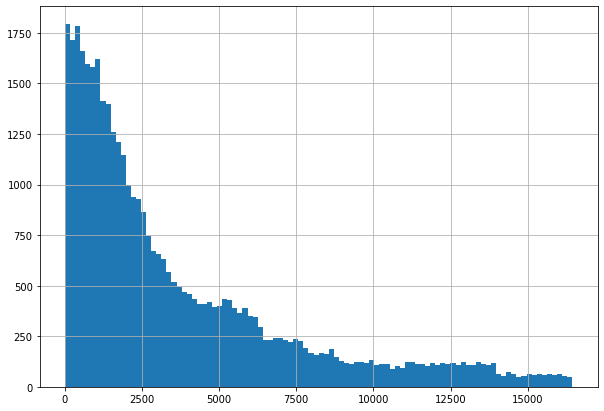

In [27]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

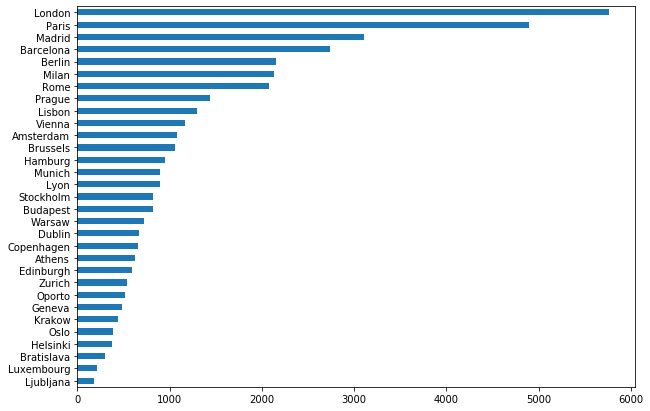

In [28]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

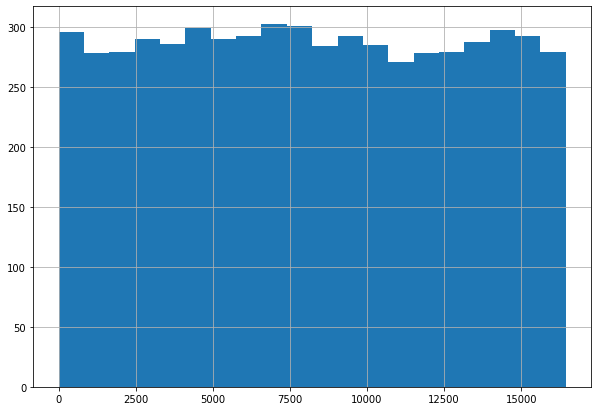

In [29]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=20)

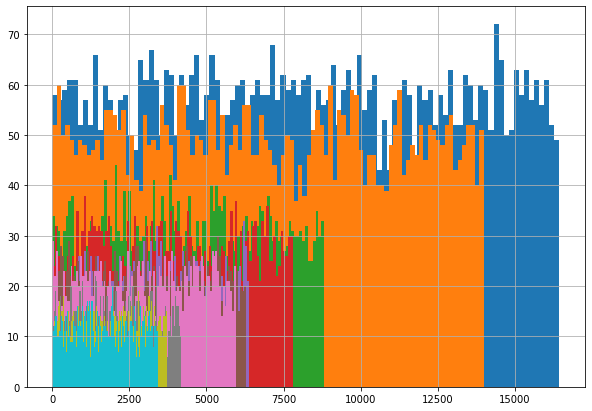

In [30]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


**Рассмотрим распределение признака Number of Reviews**

9660.0    1
8927.0    1
7622.0    1
7575.0    1
6777.0    1
6360.0    1
6309.0    1
6013.0    1
5927.0    1
5870.0    1
Name: Number of Reviews, dtype: int64

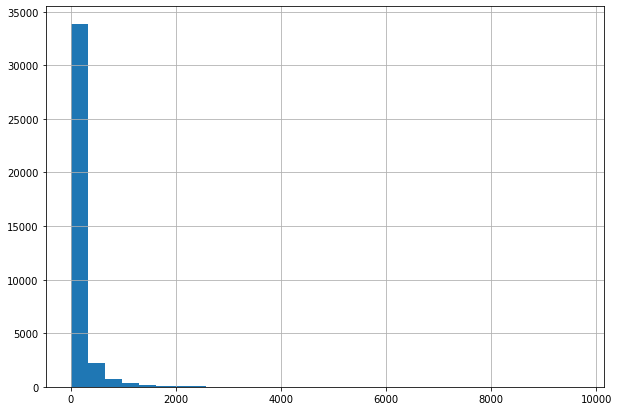

In [31]:
df_train['Number of Reviews'].hist(bins = 30)
df_train['Number of Reviews'].value_counts().sort_index(ascending=False).head(10)
#Видно, что есть несколько значений Number of Review больше 5000, однако 
#для крупных и популярных ресторанов значение может быть корректным

### Посмотрим распределение целевой переменной

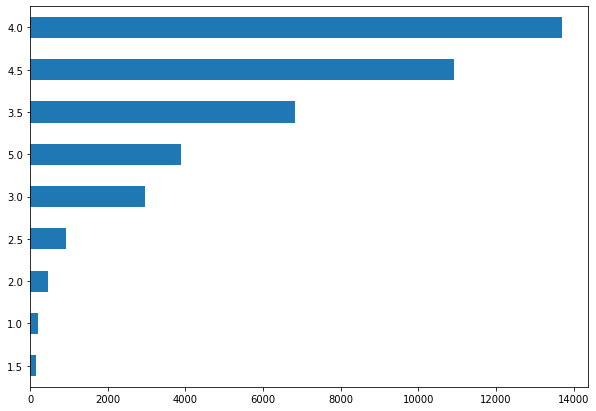

In [32]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

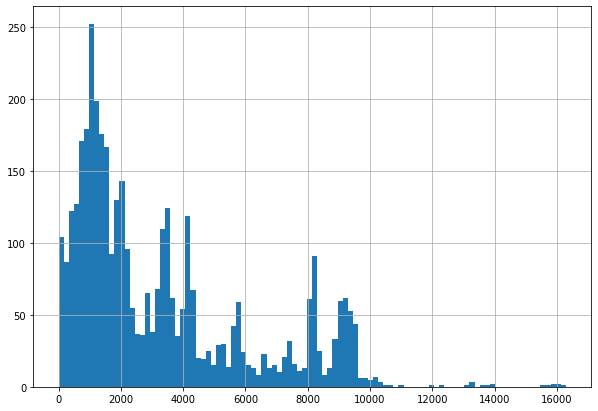

In [33]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

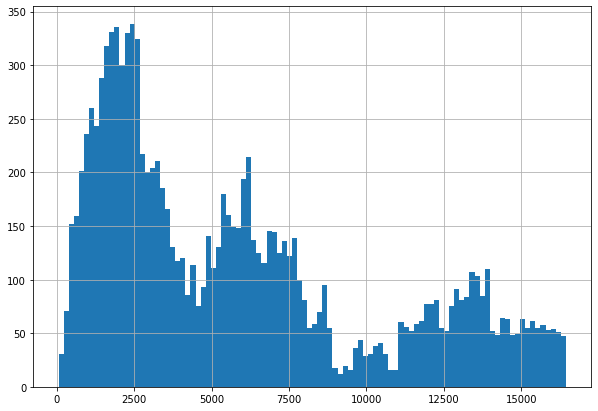

In [34]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

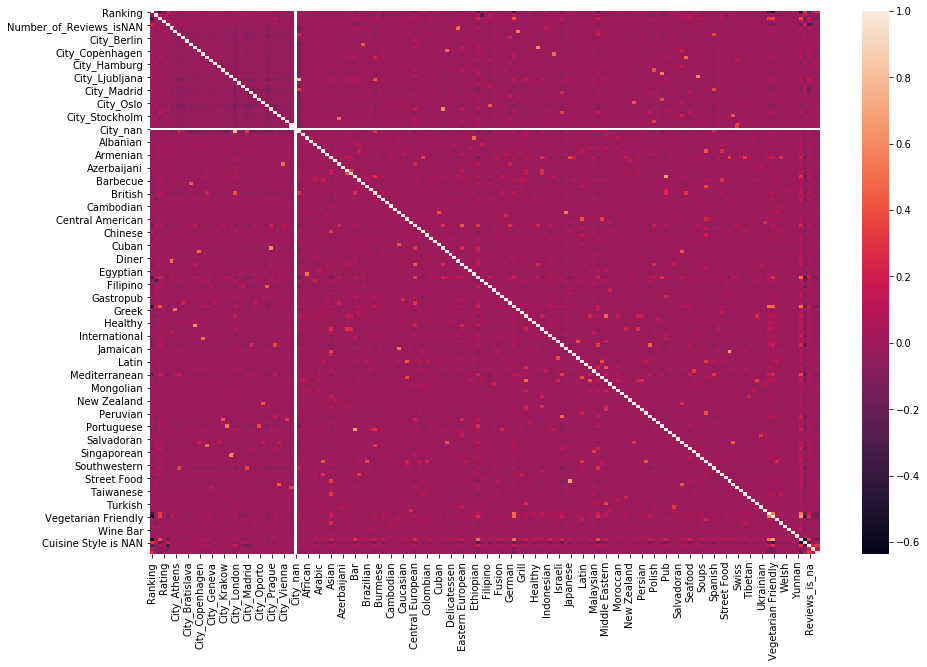

In [35]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [40]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [41]:
#Функция округления до 0.5 показателя 
def round_y_pred(y):
    return np.round(y*2)/2

#Функция заполения пропусков поля Number of Reviews следним значением по городу
def fillna_for_number_of_review(s):
    if pd.isnull(s['Number of Reviews']):
        return Number_of_Reviews_mean_of_city[s['City']]
    else:
        return s['Number of Reviews']

#Функция нормализации значений Ranking
def normalize_ranking(s, Ranking_stats_by_city_df):
    return (s['Ranking'] - Ranking_stats_by_city_df.loc[s['City']]
            ['Ranking mean']) / Ranking_stats_by_city_df.loc[s['City']]['Ranking std']

#Функция определения дат последних отзывов
def days_between_last_review_dates(s, now):
    pat = re.compile('\'\d+\/\d+\/\d+\'?')
    dates = pat.findall(s)
    new_date_list = []
    if len(dates) > 0:
        for date in dates:
            if len(date)>=2:
                date = date[1:-1]
                dt = datetime.strptime(date, '%m/%d/%Y')
                new_date_list.append(dt)
        if now:
            return (datetime.now() - max(new_date_list)).days
        else:
            return (max(new_date_list) - min(new_date_list)).days
    elif not now:
        return 0.0

def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA','URL_TA'], axis = 1, inplace=True)
        
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    
    # Замена пропусков Number of Reviews средним по городу значением
    Number_of_Reviews_mean_of_city = df_output.groupby(['City'])['Number of Reviews'].mean()
    df_output['Number of Reviews'] = df_output.apply(fillna_for_number_of_review, axis = 1)
    
    # Нормировка признака Ranking
    Ranking_mean_of_city = df_output.groupby(['City'])['Ranking'].mean()
    Ranking_mean_of_city.name = 'Ranking mean'
    Ranking_std_of_city = df_output.groupby(['City'])['Ranking'].std()
    Ranking_std_of_city.name = 'Ranking std'
    Ranking_stats_by_city_df = Ranking_mean_of_city.to_frame().join(Ranking_std_of_city)
    df_output['Ranking'] = df_output.apply(normalize_ranking, axis = 1, args = (Ranking_stats_by_city_df,))
    
    # Заполнение пустых значений Price Range самым распроставленным значением
    df_output['Price Range'].fillna('$$ - $$$', inplace = True)
    
    #Заполнение пустых значений Reviews
    df_output['Reviews'].fillna('[[], []]', inplace = True)
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    # тут ваш код не Encoding фитчей
    df_city = df_output['City'] 
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    df_output['City'] = df_city
    
    # Label Encoder для Price Range
    rank_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
    df_output['Price Range'] = df_output['Price Range'].apply(lambda x: rank_dict[x])
    
    # One-Hot Encoding для Cuisine Style
    data_cuisine = df_output['Cuisine Style']
    data_cuisine = data_cuisine.str.replace('[', '')
    data_cuisine = data_cuisine.str.replace(']', '')
    data_cuisine = data_cuisine.str.replace('\'','')
    data_cuisine = data_cuisine.str.replace(', ', ',')
    data_cuisine = data_cuisine.str.get_dummies(',')
    data_cuisine['cuisine_count'] = data_cuisine.sum(axis = 1)
    df_output = pd.concat([df_output, data_cuisine], axis = 1)
    
    
    # ################### 4. Feature Engineering ####################################################
    
    # Создание внешнего признака, обозначающего население города
    dict_population = {'Paris': 2.148 , 'Stockholm': 0.975, 'London': 8.982, 'Berlin': 3.769, 'Munich': 1.472, 'Oporto': 0.214,
       'Milan': 1.352, 'Bratislava': 0.424, 'Vienna': 1.897, 'Rome': 2.873, 'Barcelona': 5.575, 'Madrid': 6.642,
       'Dublin': 1.388, 'Brussels': 0.174, 'Zurich': 0.402, 'Warsaw': 1.708, 'Budapest': 1.752, 'Copenhagen': 0.602,
       'Amsterdam': 0.821, 'Lyon': 0.513, 'Hamburg': 1.845 , 'Lisbon': 0.504, 'Prague': 1.309, 'Oslo': 0.681,
       'Helsinki': 0.631, 'Edinburgh': 0.529, 'Geneva': 0.499, 'Ljubljana': 0.279, 'Athens': 0.664,
       'Luxembourg': 0.613, 'Krakow': 0.779}

    df_output['City_population'] = df_output.City.apply(lambda x: dict_population[x])
    
    #Создание признака передающего число дней между отзывами
    df_output['Days between reviews'] = df_output['Reviews'].apply(
        days_between_last_review_dates, args = (False,))
    #Создание признака передающего число дней с последего отзыва до самого позднего в датасете
    df_output['Last review days'] = df_output['Reviews'].apply(
        days_between_last_review_dates, args = (True,))
    The_last_review = df_output['Last review days'].min()
    df_output['Last review days'] = df_output['Last review days'].apply(
        lambda x: 0.0 if pd.isnull(x) else x - The_last_review)
    
    #Добавим признак наличия или отсутствия списка кухонь
    df_output['Cuisine Style is NAN'] = pd.isna(df_output['Cuisine Style']).astype('uint8')
    #Добавим признак наличия или отсутствия отзывов
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    #Создание признака, отвечающего за наличие хотя бы одного отзыва
    df_output['Reviews_is_NAN'] = df_output['Reviews'].apply(
        lambda x: 1 if x == '[[], []]' else 0).astype('uint8')
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [42]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,Wine Bar,Xinjiang,Yunnan,cuisine_count,City_population,Days between reviews,Last review days,Cuisine Style is NAN,Number_of_Reviews_isNAN,Reviews_is_NAN
19613,-0.084076,2,99.911888,1,5.0,0,0,0,0,0,...,0,0,0,1,6.642,0.0,0.0,0,0,1
30785,1.298336,2,19.000000,1,3.5,0,0,0,0,0,...,0,0,0,1,8.982,9.0,148.0,0,0,0
9998,0.502374,2,2.000000,0,0.0,0,0,0,0,0,...,0,0,0,1,1.352,0.0,0.0,0,0,1
12074,1.394230,2,2.000000,1,3.0,0,0,0,0,0,...,0,0,0,0,8.982,430.0,173.0,1,0,0
15374,-1.131840,2,83.000000,1,4.0,0,0,0,0,0,...,0,0,0,4,2.148,170.0,230.0,0,0,0
12808,0.132280,2,135.683096,1,5.0,0,0,1,0,0,...,0,0,0,2,5.575,0.0,0.0,0,0,1
48601,-0.840295,2,19.000000,1,4.5,0,0,0,0,0,...,0,0,0,5,1.352,0.0,134.0,0,0,0
43194,0.621082,2,2.000000,1,4.5,0,0,1,0,0,...,0,0,0,0,5.575,0.0,586.0,1,0,0
13997,0.148271,2,3.000000,1,4.5,0,0,0,0,0,...,0,0,0,0,1.309,198.0,2209.0,1,0,0
1553,-1.548865,1,867.000000,0,0.0,0,0,0,0,0,...,0,0,0,4,1.352,144.0,126.0,0,0,0


In [43]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 169 entries, Ranking to Reviews_is_NAN
dtypes: float64(6), int64(128), uint8(35)
memory usage: 52.8 MB


In [44]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [45]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [46]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 168), (40000, 168), (40000, 167), (32000, 167), (8000, 167))

# Model 
Сам ML

In [47]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [48]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [49]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [50]:
y_pred = round_y_pred(y_pred)
y_pred

array([4.5, 5. , 4. , ..., 4.5, 4. , 4. ])

In [51]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.174125


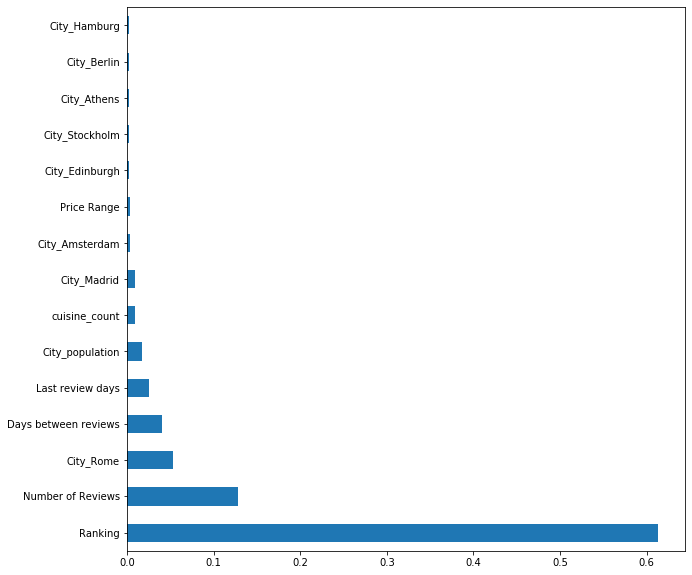

In [52]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [53]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,...,Wine Bar,Xinjiang,Yunnan,cuisine_count,City_population,Days between reviews,Last review days,Cuisine Style is NAN,Number_of_Reviews_isNAN,Reviews_is_NAN
4629,0.838153,2,24.0,0.0,0,0,0,1,0,0,...,0,0,0,2,3.769,164.0,818.0,0,0,0
4111,0.741268,1,23.0,0.0,0,0,0,0,0,0,...,0,0,0,3,0.499,173.0,586.0,0,0,0
8993,0.830509,1,8.0,0.0,0,0,0,0,0,0,...,0,0,0,3,8.982,66.0,863.0,0,0,0
4549,-0.828545,2,59.0,0.0,0,0,1,0,0,0,...,0,0,0,3,5.575,0.0,97.0,0,0,0
9811,0.554822,2,32.0,0.0,0,0,0,0,0,0,...,0,0,0,1,2.148,346.0,514.0,0,0,0
4915,-0.035713,2,48.0,0.0,0,0,0,0,0,0,...,0,0,0,4,8.982,75.0,312.0,0,0,0
8723,0.271634,2,2.0,0.0,0,0,0,0,0,0,...,1,0,0,1,1.472,0.0,0.0,0,0,1
8830,0.180703,2,266.0,0.0,0,0,0,0,0,0,...,0,0,0,4,2.873,39.0,117.0,0,0,0
4794,-0.367003,2,37.0,0.0,0,0,0,0,0,0,...,0,0,0,2,8.982,1.0,55.0,0,0,0
1559,-1.097268,2,22.0,0.0,0,0,0,0,0,0,...,0,0,0,4,6.642,0.0,0.0,0,0,1


In [54]:
test_data = test_data.drop(['Rating'], axis=1)

In [55]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [56]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [57]:
predict_submission

array([3.105, 4.25 , 4.435, ..., 3.165, 4.45 , 4.315])

In [58]:
sample_submission['Rating'] = round_y_pred(predict_submission)
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,3.0
7,id_7,3.0
8,id_8,4.5
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
